# Classifier evaluation metrics 

## Read the data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
Data=pd.read_csv ('DataExample.csv')
Data.head()


,ClassEdemaPre,ClassEdemaPost,ClassTissueFlair,ClassEdemaFlair,ClassTumorFlair,ClassTissuePost,ClassTumorPost,ClassTissuePre,ClassTumorPre
0,-0.633392,-1.010093,-1.138508,0.869502,-1.065829,-0.699068,1.141589,-1.103311,-1.146165
1,0.724148,0.470747,1.323406,0.625738,-0.919391,0.921529,-0.373782,1.026931,-0.810055
2,0.482401,0.084489,-0.155202,0.574753,0.982133,0.836447,1.399716,0.065277,0.107274
3,-1.097461,-1.526624,-0.954765,-1.162871,-1.031681,-1.045831,-0.393389,-1.552680,-0.937601
4,-1.523269,-1.099812,-0.067879,1.143661,0.774409,1.532917,-0.282389,0.226641,2.523577


In [2]:
ClassBrainTissuepost=(Data['ClassTissuePost'].values)
ClassBrainTissuepost= (np.asarray(ClassBrainTissuepost))
ClassBrainTissuepost=ClassBrainTissuepost[~np.isnan(ClassBrainTissuepost)]
ClassBrainTissuepre=(Data[['ClassTissuePre']].values)
ClassBrainTissuepre= (np.asarray(ClassBrainTissuepre))
ClassBrainTissuepre=ClassBrainTissuepre[~np.isnan(ClassBrainTissuepre)]
ClassTUMORpost=(Data[['ClassTumorPost']].values)
ClassTUMORpost= (np.asarray(ClassTUMORpost))
ClassTUMORpost=ClassTUMORpost[~np.isnan(ClassTUMORpost)]
ClassTUMORpre=(Data[['ClassTumorPre']].values)
ClassTUMORpre= (np.asarray(ClassTUMORpre))
ClassTUMORpre=ClassTUMORpre[~np.isnan(ClassTUMORpre)]
X_1 = np.stack((ClassBrainTissuepost,ClassBrainTissuepre)) # we only take the first two features.
X_2 = np.stack((ClassTUMORpost,ClassTUMORpre))
X=np.concatenate((X_1.transpose(), X_2.transpose()),axis=0)
y =np.zeros((np.shape(X))[0])
y[np.shape(X_1)[1]:]=1

## Split training testing 

In [3]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## train a logistic regression model on the training set


In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## make class predictions for the testing set


In [5]:
y_pred_class = logreg.predict(X_test)

## calculate accuracy


In [6]:
# Classification accuracy: percentage of correct predictions

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.484


## Confusion matrix 

In [7]:
print(metrics.confusion_matrix(y_test, y_pred_class))


[[  0 254]
 [  4 242]]


In [8]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


##  Classification Accuracy
Overall, how often is the classifier correct


In [9]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.484
0.484


In [10]:
##  Classification Error
Overall, how often is the classifier incorrect?


Object `incorrect` not found.


In [ ]:
Overall, how often is the classifier incorrect

In [11]:
Overall, how often is the classifier incorrect

SyntaxError: invalid syntax (<ipython-input-11-63b187165557>, line 1)

In [12]:
Overall, how often is the classifier incorrect

SyntaxError: invalid syntax (<ipython-input-12-63b187165557>, line 1)

In [ ]:
Overall, how often is the classifier incorrect

In [13]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.516
0.516


## Sensitivity
When the actual value is positive, how often is the prediction correct?


In [14]:
 
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.983739837398
0.983739837398


## Specificity
When the actual value is negative, how often is the prediction correct?


In [15]:
print(TN / float(TN + FP))


0.0


## False Positive Rate

When the actual value is negative, how often is the prediction incorrect?


In [16]:

print(FP / float(TN + FP))


1.0


## Precision
When a positive value is predicted, how often is the prediction correct?


In [17]:

print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.487903225806
0.487903225806


## ROC Curves and Area Under the Curve (AUC)

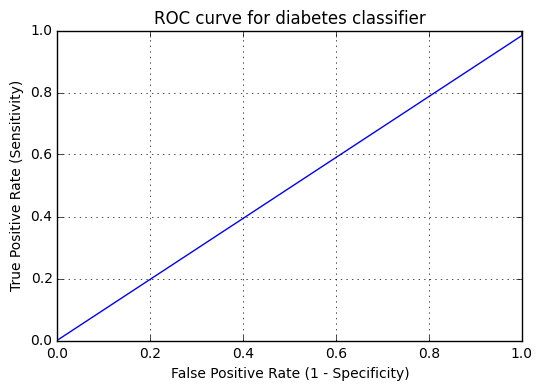

In [18]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [19]:

# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.5)


('Sensitivity:', 0.98373983739837401)
('Specificity:', 0.0)


## AUC 
The percentage of the ROC plot that is underneath the curve:


In [20]:

print(metrics.roc_auc_score(y_test, y_pred_class))


0.491869918699


### calculate cross-validated AUC

In [21]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

/Users/m112447/Documents/PythonEnv/skynet/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.44006999999999996